## Python & SQL

<center>

## Credit Risk Analysis Framework

[Dhirat Raut]

</center>








---
*The material used in this project includes Linear Statistical Modeling, Machine Learning for Scientific Computing, Stochastic Processes, Financial Programming, and Risk Management.*




---





**What is a Credit Risk? Why do we have to implement Machine Learning Models? Aren't Financial and Accounting models enought to solve such problems?**

Credit risk is defined as the potential loss arising from a borrower or counterparty failing to meet its obligations according to the agreed terms. Machine learning plays a crucial role in credit risk modeling due to its capacity to analyze complex data relationships and improve predictive accuracy. Unlike traditional methods, which may rely on simplified assumptions, machine learning algorithms can effectively capture nonlinearities and interactions among various risk factors, thereby enhancing risk assessments. These models adapt to changing market conditions and borrower behaviors, ensuring robust and responsive credit decisions over time. By automating and optimizing credit underwriting processes, machine learning enables financial institutions to manage risk more effectively and make informed lending decisions that enhance overall portfolio performance and stability.

Financial and accounting models are essential for evaluating credit risk, offering sophisticated frameworks for assessing a broad range of financial and non-financial data. However, these models often rely on predefined rules and assumptions that may not capture all the nuances and complexities present in borrower data. Machine learning complements these models by analyzing large volumes of data and uncovering patterns that traditional methods might miss. ML models can handle non-linear relationships, adapt to changing conditions, and incorporate a wider array of variables beyond what financial and accounting models typically consider. This integration results in more accurate risk assessments and allows financial institutions to make more informed and agile decisions in managing credit risk. Thus, while financial and accounting models provide a strong foundation, incorporating machine learning significantly enhances their effectiveness in modern risk management practices.

Machine learning models such as **Logistic Regression, Regularized Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting Classifier, along with explainable artificial intelligence (XAI) techniques**, were employed to develop a comprehensive risk model. Each model's robustness were evaluated based on accuracy, classification reports, and the underlying transparency or explainability.






In [ ]:
summary_table

Model  Accuracy  Weighted Avg Precision  \
0              Logistic Regression     89.24                    91.0   
1  Regularized Logistic Regression     89.22                    91.0   
2                   Decission Tree     89.27                    91.0   
3                    Random Forest     89.58                    91.0   
4                Gradiant Boosting     90.32                    90.0   

   Weighted Avg Recall  Weighted Avg F1-Score Explainability  
0                 89.0                   89.0           self  
1                 89.0                   89.0           self  
2                 89.0                   89.0           less  
3                 90.0                   89.0           less  
4                 90.0                   90.0             No

In [ ]:
!pip install -U imbalanced-learn
!pip install pandasql
!pip install opendatasets
!pip install shap
!pip install feature-engine

In [ ]:
import pandas as pd
import pandasql as psql
from plotly.subplots import make_subplots
import plotly.express as py
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import shap
import opendatasets as od
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_text, plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
od.download("https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download&SSORegistrationToken=CfDJ8GYiNaMVVSVCnegdIdgHCPMu_YcUYaYm0ll9JjZTLvCBdvKZnYSZRkhmP0t3SuCcP1V_Vk1qmLbsFoun1jaZ5gAFyzNQMLZmDYCCV3J5ecq78yMViidnI52hvEmFe31xab-98TipNmsU5aBnZZgkBpzDduq6xjxf05kx4F5wAWv95g3InkcrwUdqvrgnUEd3ADdcrTnvp87D3vrlaA1Cz2ZcdNR9Sp4tfPeMHJnPypkeGsyHfrfs2TxRdtHWfLrFcK5BwEF7gaIoFuWlfvAQ8eigQuufZseuDTKCxYWKBzinJu3OChovMAZLFRlG8Cv16LQkZxHJkcAa5QrhFQib8w&DisplayName=Sudip+Khadka&select=credit_risk_dataset.csv")

Skipping, found downloaded files in "./credit-risk-dataset" (use force=True to force download)


In [ ]:
fl = pd.read_csv("/content/credit-risk-dataset/credit_risk_dataset.csv")

In [ ]:
fl

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [ ]:
fl['default'] = [1 if i == 'Y' else 0 for i in fl['cb_person_default_on_file']]


In [ ]:
fl

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  default  
0                               3        1  
1                               2        0  
2                               3        0  
3                               2        0  
4                               4        1  
...                           ...      ...  
32576                          30        0  
32577                          19        0  
32578                          28        0  
32579                          26        0  
32580                          30        0  

[32581 rows x 13 columns]

# Data Exploration

In [ ]:
fl = fl.drop_duplicates()

In [ ]:
print(fl.shape)
print(fl.isna().sum())

(32416, 13)
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
default                          0
dtype: int64


In [ ]:
fl = fl.dropna()
print(fl.shape)
print(fl.isna().sum())


(28501, 13)
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
default                       0
dtype: int64


In [ ]:
fl1 = fl.copy(deep=True)

In [ ]:
'''Check for continous features and categorical features'''
def preprocess_data(df):
    continuous_columns = []
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            continuous_columns.append(column)
        else:
          categorical_columns.append(column)
    return continuous_columns, categorical_columns


In [ ]:
print(f'Contionus Features: {preprocess_data(fl1)[0]}')
print(f'Categorical Features: {preprocess_data(fl1)[1]}')

Contionus Features: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'default']
Categorical Features: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
cont_feature = fl1[preprocess_data(fl1)[0]]
cont_feature

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  default  
0                1                 0.59                           3        1  
1                0                 0.10                           2        0  
2                1                 0.57                           3        0  
3                1                 0.53                           2        0  
4                1                 0.55                           4        1  
...            ...                  ...                         ...      ...  
32576            0                 0.11                          30        0  
32577            0                 0.15                          19        0  
32578            1                 0.46                          28        0  
32579            0                 0.10                          26        0  
32580            0                 0.15                          30        0  

[28501 rows x 9 columns]

In [ ]:
cont_feature.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  28501.000000   2.850100e+04       28501.000000  28501.000000   
mean      27.738676   6.665441e+04           4.790148   9658.533034   
std        6.316166   6.237603e+04           4.157462   6329.604672   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.950000e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28501.000000  28501.000000         28501.000000   
mean       11.045385      0.217115             0.169517   
std         3.230748      0.412289             0.106410   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length       default  
count                28501.000000  28501.000000  
mean                     5.800498      0.178590  
std                      4.042153      0.383016  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

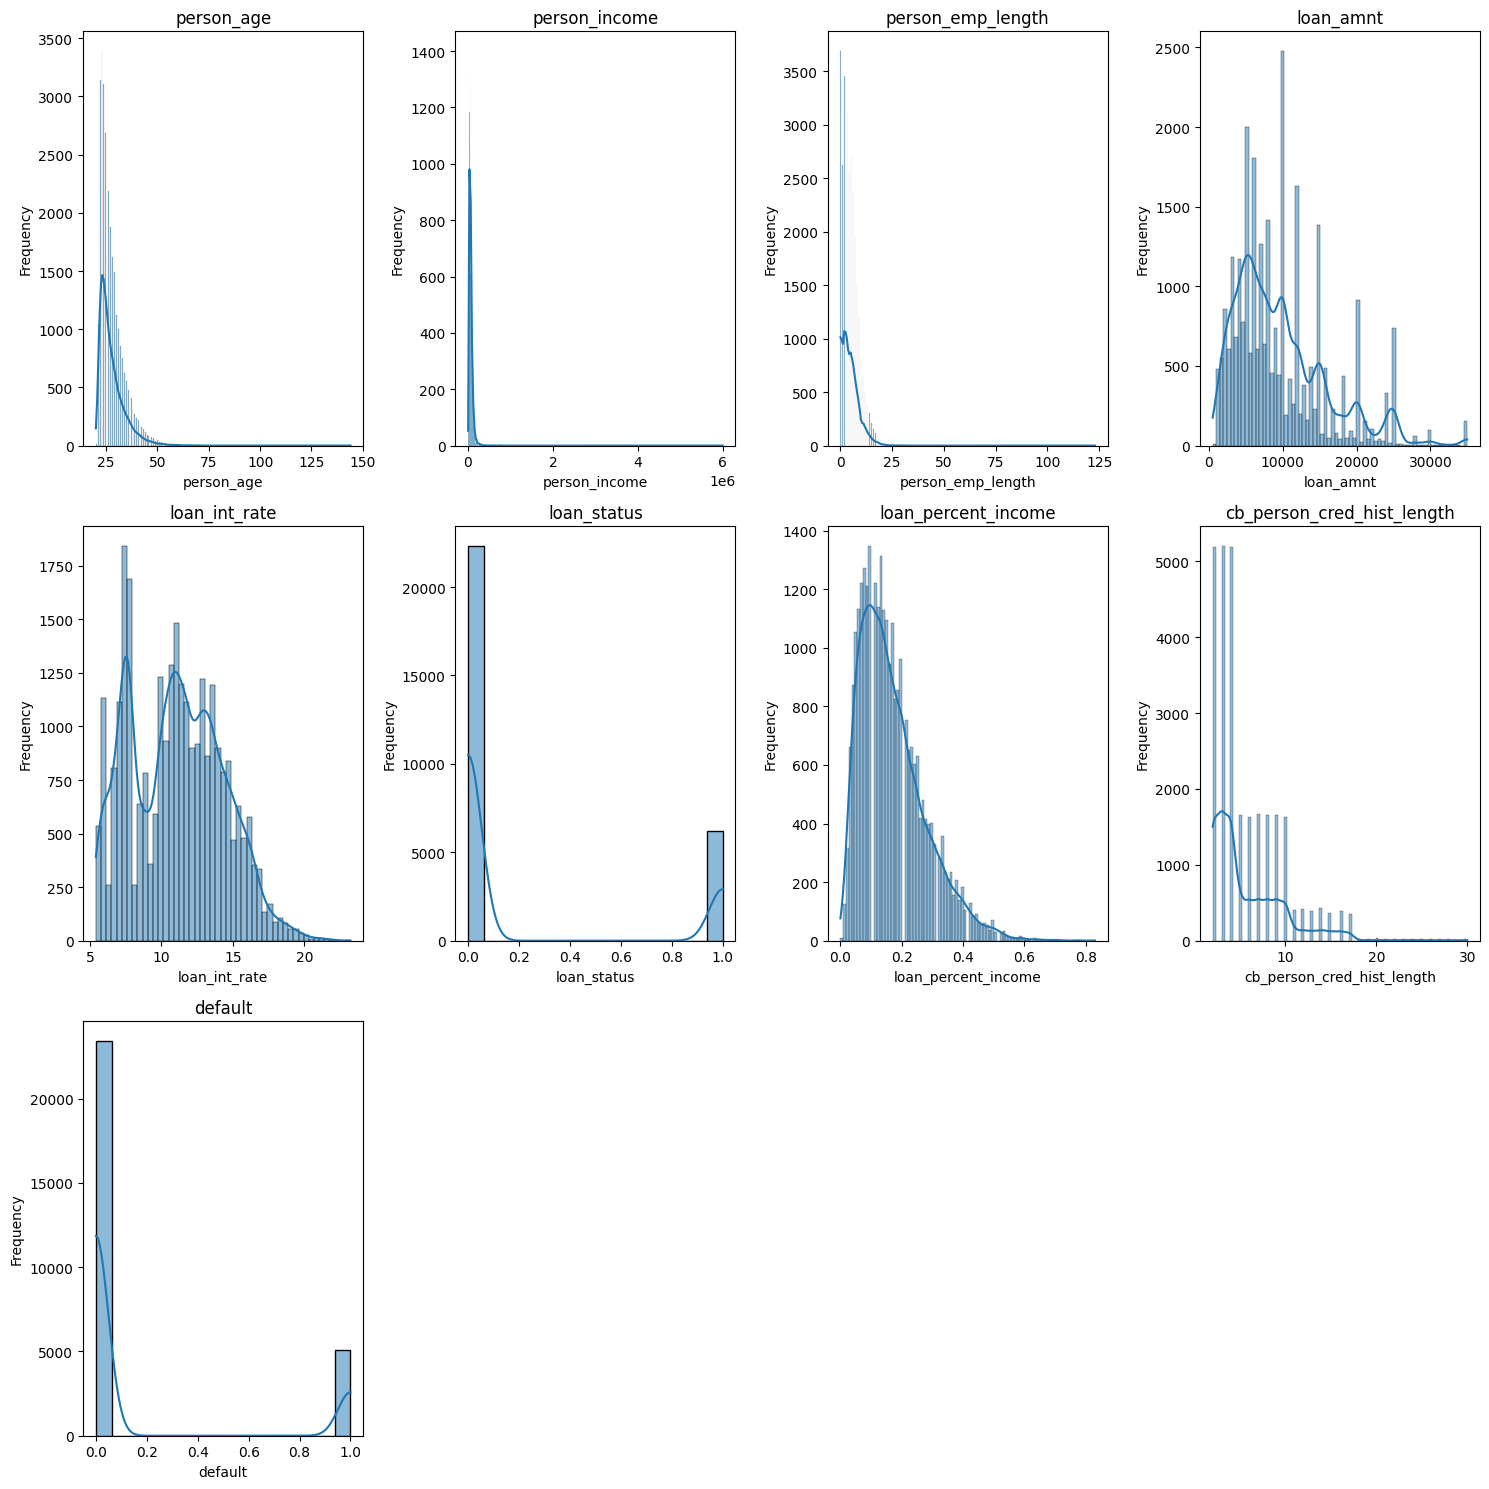

In [ ]:
cols = 4
col = cont_feature.columns
features_count = len(col)
rows = (features_count + cols -1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, ax in zip(col, axes):
    sns.histplot(cont_feature[i], ax=ax, kde=True)
    ax.set_title(i)
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
for ax in axes[features_count:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#all Insurance TYPES
query = """
SELECT
loan_intent,
(SUM(CASE WHEN cb_person_default_on_file = 'Y' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM fl WHERE cb_person_default_on_file = 'N') AS FLOAT) * 100) AS Liklehood_Default
FROM fl
GROUP BY loan_intent
"""
loan_type = psql.sqldf(query,locals())

#all Ownership TYPES
query = """
SELECT
person_home_ownership,
(SUM(CASE WHEN cb_person_default_on_file = 'Y' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM fl WHERE cb_person_default_on_file = 'N') AS FLOAT) * 100) AS Liklehood_Default
FROM fl
GROUP BY person_home_ownership
"""
ownership_type = psql.sqldf(query,locals())

#all Grade TYPES
query = """
SELECT
loan_grade,
(SUM(CASE WHEN cb_person_default_on_file = 'Y' THEN 1 ELSE 0 END) / CAST((SELECT COUNT(*) FROM fl WHERE cb_person_default_on_file = 'N') AS FLOAT) * 100) AS Liklehood_Default
FROM fl
GROUP BY loan_grade
"""
grade_type = psql.sqldf(query,locals())

In [ ]:
fig1 = go.Figure(data=[go.Pie(
    labels=loan_type['loan_intent'],
    values=loan_type['Liklehood_Default'],
    hole=0.5,
    title='Loan Type Default',
    marker_colors=py.colors.sequential.RdBu
)])

fig2 = go.Figure(data=[go.Pie(
    labels=ownership_type['person_home_ownership'],
    values=ownership_type['Liklehood_Default'],
    hole=0.5,
    marker_colors=py.colors.sequential.RdBu
)])

fig3 = go.Figure(data=[go.Pie(
    labels=grade_type['loan_grade'],
    values=grade_type['Liklehood_Default'],
    hole=0.5,
    marker_colors=py.colors.sequential.RdBu
)])

figs = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'},{'type': 'domain'}]],
                    subplot_titles=("Default by Loan Types", "Default by Ownership","Default by Grade Types"))


figs.add_trace(fig1.data[0], row=1, col=1)
figs.add_trace(fig2.data[0], row=1, col=2)
figs.add_trace(fig3.data[0], row=1, col=3)
figs.update_layout(title_text="Default Percentage and Liklehood of Default by Loan Types, Ownerships and Grades")
figs.show()

In [ ]:
corelation_matrix = cont_feature.corr()
corelation_matrix

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.178987           0.165624   
person_income                 0.178987       1.000000           0.136427   
person_emp_length             0.165624       0.136427           1.000000   
loan_amnt                     0.054246       0.264942           0.110934   
loan_int_rate                 0.010170      -0.001346          -0.056607   
loan_status                  -0.024091      -0.140456          -0.082852   
loan_percent_income          -0.040782      -0.251487          -0.055033   
cb_person_cred_hist_length    0.859621       0.116622           0.146486   
default                       0.007181      -0.002653          -0.028179   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.054246       0.010170    -0.024091   
person_income                0.264942      -0.001346    -0.140456   
person_emp_length            0.110934      -0.056607    -0.082852   
loan_amnt                    1.000000       0.146026     0.114153   
loan_int_rate                0.146026       1.000000     0.339995   
loan_status                  0.114153       0.339995     1.000000   
loan_percent_income          0.577708       0.123441     0.380000   
cb_person_cred_hist_length   0.045334       0.014562    -0.016559   
default                      0.040714       0.500174     0.182397   

                            loan_percent_income  cb_person_cred_hist_length  \
person_age                            -0.040782                    0.859621   
person_income                         -0.251487                    0.116622   
person_emp_length                     -0.055033                    0.146486   
loan_amnt                              0.577708                    0.045334   
loan_int_rate                          0.123441                    0.014562   
loan_status                            0.380000                   -0.016559   
loan_percent_income                    1.000000                   -0.029690   
cb_person_cred_hist_length            -0.029690                    1.000000   
default                                0.036503                    0.007988   

                             default  
person_age                  0.007181  
person_income              -0.002653  
person_emp_length          -0.028179  
loan_amnt                   0.040714  
loan_int_rate               0.500174  
loan_status                 0.182397  
loan_percent_income         0.036503  
cb_person_cred_hist_length  0.007988  
default                     1.000000

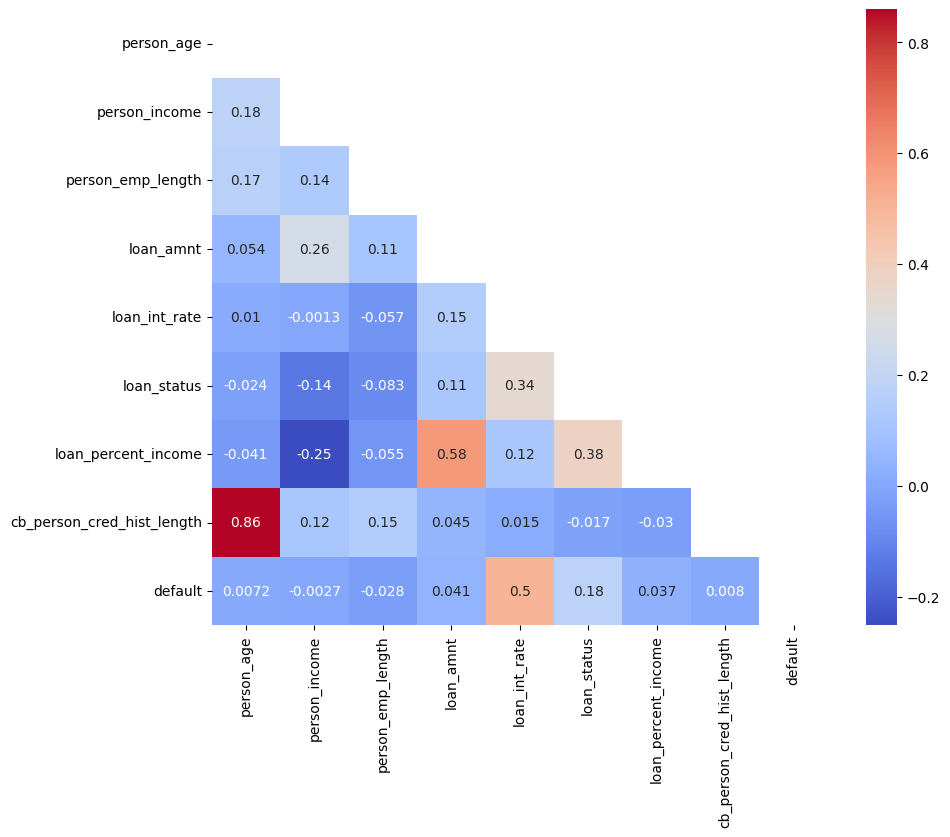

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corelation_matrix, annot=True, square=True, mask=np.triu(corelation_matrix), cmap='coolwarm')
plt.show()

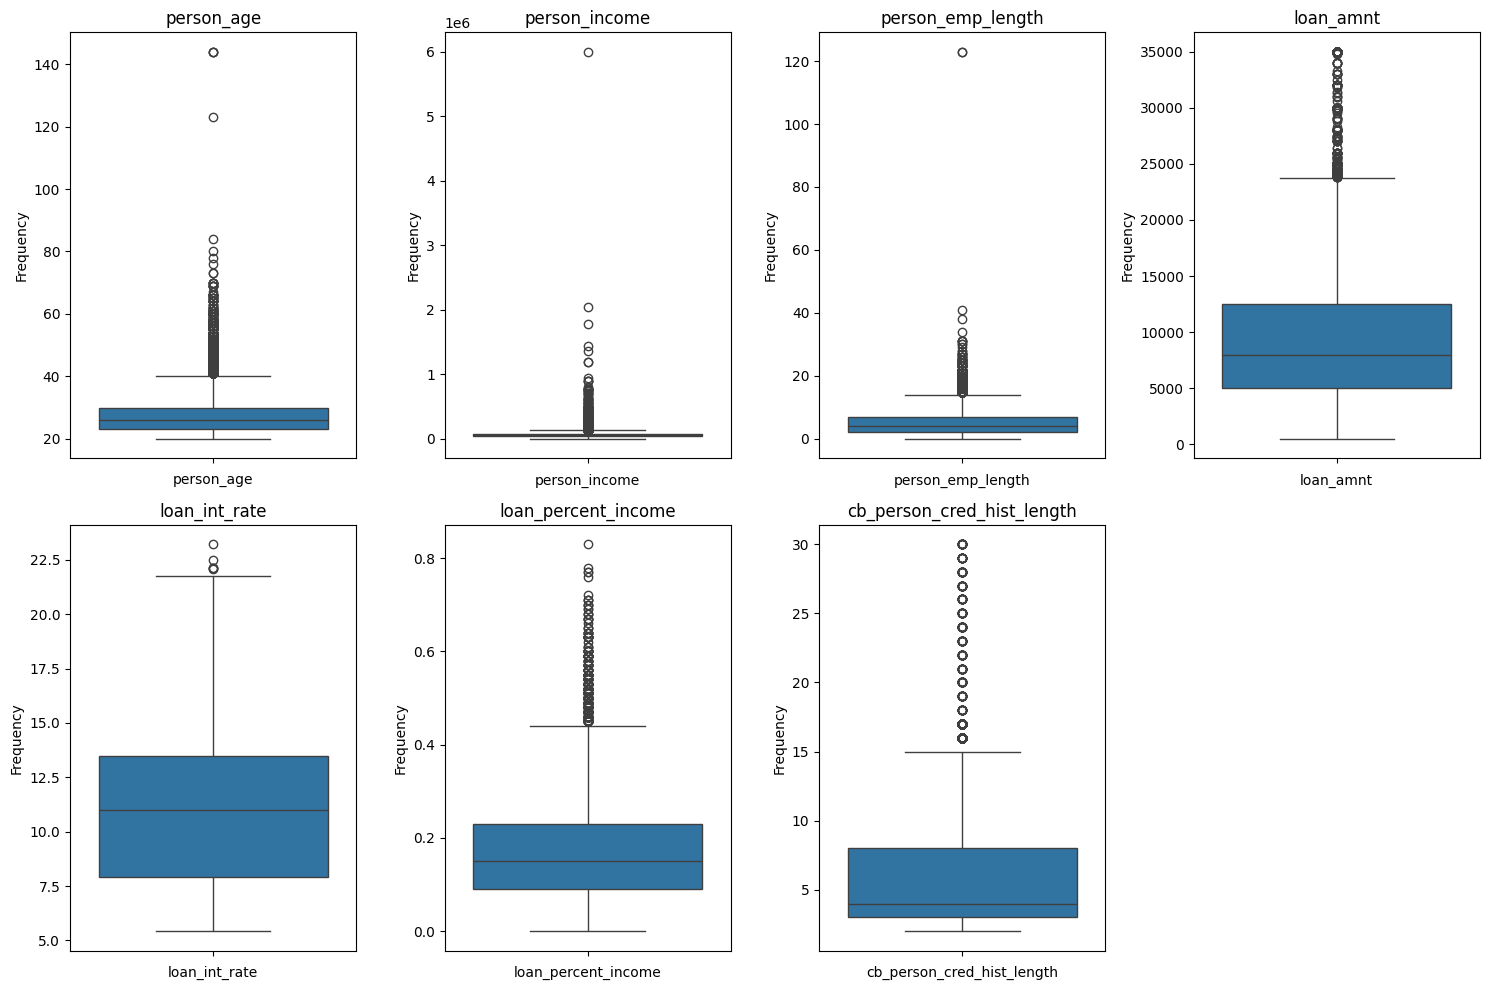

In [ ]:
#Check for outliers:
def box_plot(df):
  cols = 4
  col = df.columns
  features_count = len(col)
  rows = (features_count + cols -1) // cols
  fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
  axes = axes.flatten()

  for i, ax in zip(col, axes):
      sns.boxplot(df[i], ax=ax)
      ax.set_title(i)
      ax.set_xlabel(i)
      ax.set_ylabel('Frequency')
  for ax in axes[features_count:]:
      ax.axis('off')

  plt.tight_layout()
  plt.show()

box_plot(cont_feature.drop(columns=['loan_status','default']))

**Z-score Outlier detection**

In [ ]:
#filtering outliers using z-score. Removing observation that are 3 SD away from mean
def outlier_filter(df, columns):
    for col in columns:
        mean = np.mean(df[col])
        std = np.std(df[col])
        threshold = 3 * std
        filter_mask = abs(df[col] - mean) <= threshold
        df = df[filter_mask]
    return df

columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
           'loan_percent_income', 'cb_person_cred_hist_length']

filtered_fl = outlier_filter(fl1, columns)

In [ ]:
filtered_fl

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
5              21           9900                   OWN                2.0   
9              21          10000                   OWN                6.0   
11             21          10000                   OWN                2.0   
19             24          10800              MORTGAGE                8.0   
...           ...            ...                   ...                ...   
32290          37          90000              MORTGAGE               11.0   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1              EDUCATION          B       1000          11.14            0   
5                VENTURE          A       2500           7.14            1   
9                VENTURE          D       1600          14.74            1   
11       HOMEIMPROVEMENT          A       4500           8.63            1   
19             EDUCATION          B       1750          10.99            1   
...                  ...        ...        ...            ...          ...   
32290  DEBTCONSOLIDATION          A       4000           6.62            0   
32292  DEBTCONSOLIDATION          A       3000           7.68            0   
32293            MEDICAL          B      16000          11.99            0   
32295  DEBTCONSOLIDATION          F      25000          16.15            1   
32296          EDUCATION          F      15000          18.62            1   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
5                     0.25                         N   
9                     0.16                         N   
11                    0.45                         N   
19                    0.16                         N   
...                    ...                       ...   
32290                 0.04                         N   
32292                 0.01                         N   
32293                 0.15                         N   
32295                 0.25                         Y   
32296                 0.29                         Y   

       cb_person_cred_hist_length  default  
1                               2        0  
5                               2        0  
9                               3        0  
11                              2        0  
19                              2        0  
...                           ...      ...  
32290                          15        0  
32292                          12        0  
32293                          13        0  
32295                          14        1  
32296                          16        1  

[26489 rows x 13 columns]

In [ ]:
filtered_fl.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  26489.000000   26489.000000       26489.000000  26489.000000   
mean      26.994941   62488.977198           4.545547   9241.644645   
std        4.966056   32952.376032           3.605841   5760.229995   
min       20.000000    4080.000000           0.000000    500.000000   
25%       23.000000   39000.000000           2.000000   5000.000000   
50%       26.000000   55000.000000           4.000000   8000.000000   
75%       29.000000   78000.000000           7.000000  12000.000000   
max       46.000000  210000.000000          16.000000  28000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   26489.000000  26489.000000         26489.000000   
mean       11.000553      0.210200             0.165736   
std         3.191053      0.407459             0.097963   
min         5.420000      0.000000             0.010000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.220000   
max        20.620000      1.000000             0.480000   

       cb_person_cred_hist_length       default  
count                26489.000000  26489.000000  
mean                     5.355053      0.176451  
std                      3.355698      0.381210  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      7.000000      0.000000  
max                     16.000000      1.000000

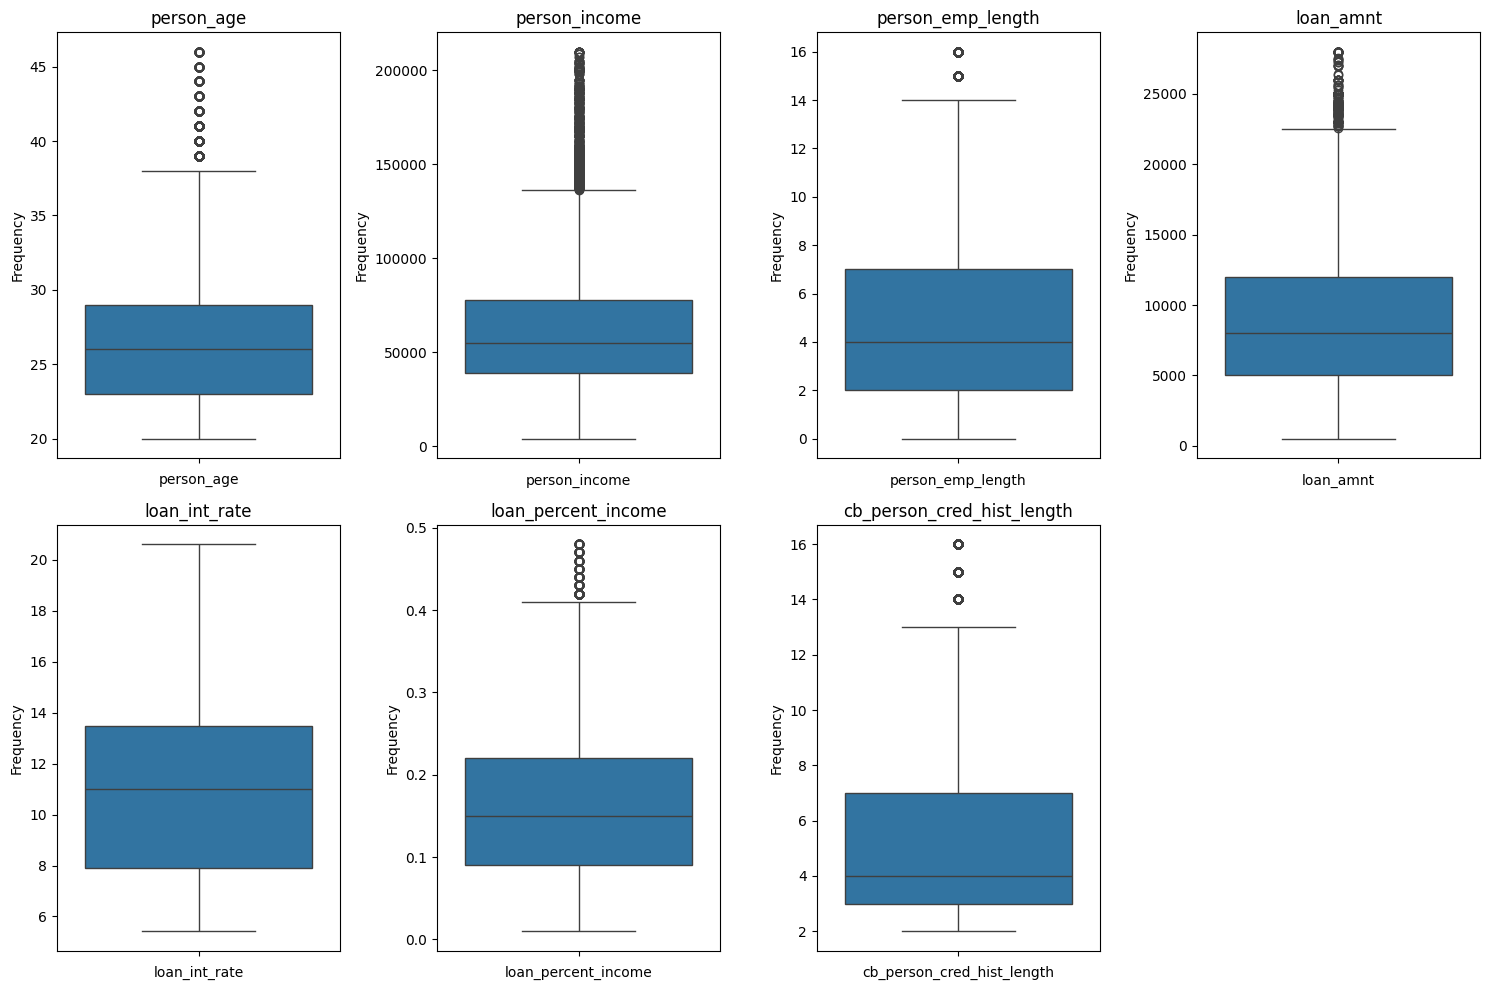

In [ ]:
box_plot(filtered_fl[preprocess_data(filtered_fl)[0]].drop(columns=['loan_status','default']))

In [ ]:
print(filtered_fl.shape)

(26489, 13)


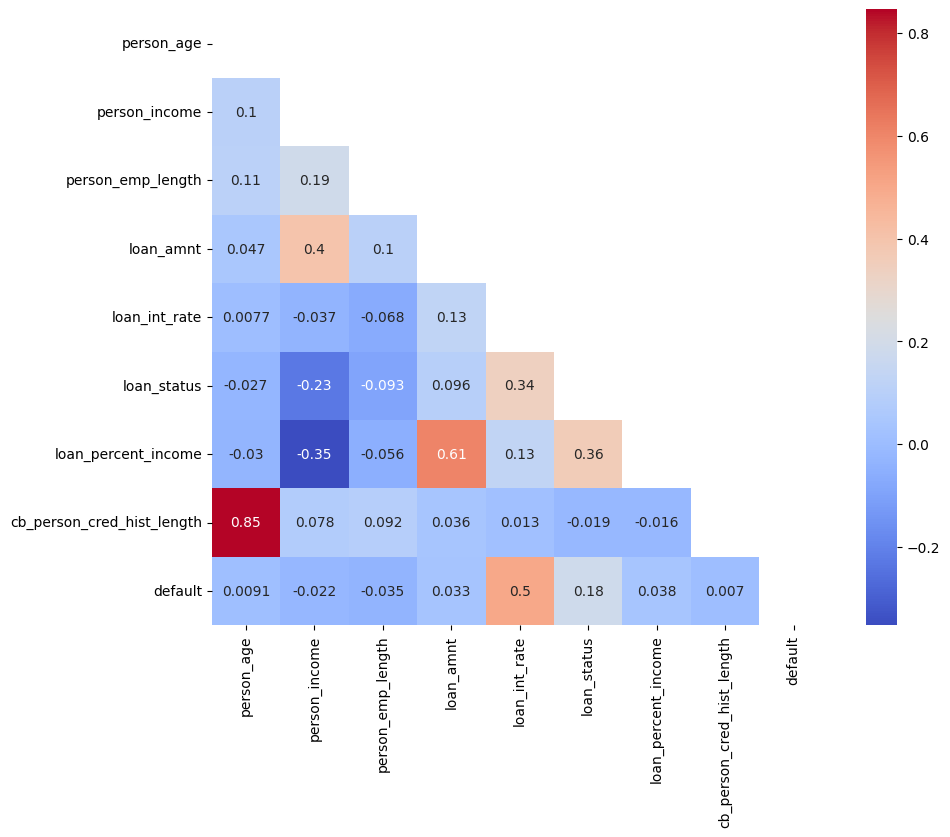

In [ ]:
cont_fl = filtered_fl[preprocess_data(filtered_fl)[0]]
plt.figure(figsize=(10,8))
corelation_matrix= cont_fl.corr()
sns.heatmap(corelation_matrix, annot=True, square=True, mask=np.triu(corelation_matrix), cmap='coolwarm')
plt.show()

In [ ]:
filtered_fl['income_group'] = pd.cut(filtered_fl['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [ ]:
filtered_fl['loan_group'] = pd.cut(filtered_fl['loan_amnt'],
                              bins=[0, 5000, 15000, 25000, 35000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [ ]:
new_df = filtered_fl.copy()

In [ ]:
new_df = new_df.drop(columns=['cb_person_default_on_file'])
new_df

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
5              21           9900                   OWN                2.0   
9              21          10000                   OWN                6.0   
11             21          10000                   OWN                2.0   
19             24          10800              MORTGAGE                8.0   
...           ...            ...                   ...                ...   
32290          37          90000              MORTGAGE               11.0   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1              EDUCATION          B       1000          11.14            0   
5                VENTURE          A       2500           7.14            1   
9                VENTURE          D       1600          14.74            1   
11       HOMEIMPROVEMENT          A       4500           8.63            1   
19             EDUCATION          B       1750          10.99            1   
...                  ...        ...        ...            ...          ...   
32290  DEBTCONSOLIDATION          A       4000           6.62            0   
32292  DEBTCONSOLIDATION          A       3000           7.68            0   
32293            MEDICAL          B      16000          11.99            0   
32295  DEBTCONSOLIDATION          F      25000          16.15            1   
32296          EDUCATION          F      15000          18.62            1   

       loan_percent_income  cb_person_cred_hist_length  default income_group  \
1                     0.10                           2        0          low   
5                     0.25                           2        0          low   
9                     0.16                           3        0          low   
11                    0.45                           2        0          low   
19                    0.16                           2        0          low   
...                    ...                         ...      ...          ...   
32290                 0.04                          15        0  high-middle   
32292                 0.01                          12        0         high   
32293                 0.15                          13        0         high   
32295                 0.25                          14        1         high   
32296                 0.29                          16        1       middle   

       loan_group  
1             low  
5             low  
9             low  
11            low  
19            low  
...           ...  
32290         low  
32292         low  
32293      middle  
32295      middle  
32296  low-middle  

[26489 rows x 14 columns]

In [ ]:
#One hot encoding for all catogerical variables
def preprocess_data(df):
    continuous_columns = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            continuous_columns.append(column)

    for col in df.columns:
        if col not in continuous_columns:
            unique = df[col].unique()
            for i in unique:
                new_col_name = f"{col}_{i}"
                df[new_col_name] = (df[col] == i).astype(int)
            del df[col]

    return df

In [ ]:
final_df = preprocess_data(new_df)
final_df

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1              21           9600                5.0       1000          11.14   
5              21           9900                2.0       2500           7.14   
9              21          10000                6.0       1600          14.74   
11             21          10000                2.0       4500           8.63   
19             24          10800                8.0       1750          10.99   
...           ...            ...                ...        ...            ...   
32290          37          90000               11.0       4000           6.62   
32292          38         200000                0.0       3000           7.68   
32293          38         110000                5.0      16000          11.99   
32295          42         101000                6.0      25000          16.15   
32296          40          52000                2.0      15000          18.62   

       loan_status  loan_percent_income  cb_person_cred_hist_length  default  \
1                0                 0.10                           2        0   
5                1                 0.25                           2        0   
9                1                 0.16                           3        0   
11               1                 0.45                           2        0   
19               1                 0.16                           2        0   
...            ...                  ...                         ...      ...   
32290            0                 0.04                          15        0   
32292            0                 0.01                          12        0   
32293            0                 0.15                          13        0   
32295            1                 0.25                          14        1   
32296            1                 0.29                          16        1   

       person_home_ownership_OWN  ...  loan_grade_G  income_group_low  \
1                              1  ...             0                 1   
5                              1  ...             0                 1   
9                              1  ...             0                 1   
11                             1  ...             0                 1   
19                             0  ...             0                 1   
...                          ...  ...           ...               ...   
32290                          0  ...             0                 0   
32292                          0  ...             0                 0   
32293                          0  ...             0                 0   
32295                          0  ...             0                 0   
32296                          0  ...             0                 0   

       income_group_middle  income_group_high-middle  income_group_high  \
1                        0                         0                  0   
5                        0                         0                  0   
9                        0                         0                  0   
11                       0                         0                  0   
19                       0                         0                  0   
...                    ...                       ...                ...   
32290                    0                         1                  0   
32292                    0                         0                  1   
32293                    0                         0                  1   
32295                    0                         0                  1   
32296                    1                         0                  0   

       income_group_low-middle  loan_group_low  loan_group_high-middle  \
1                            0               1                       0   
5                            0               1                       0   
9                            0               1                       0   

In [ ]:
X = final_df.drop(['default','person_age','person_income','loan_status','loan_amnt'], axis=1)
y = final_df['default']

In [ ]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('correlated',DropCorrelatedFeatures()),
    ('duplicate',DropDuplicateFeatures())
])

X = pipeline.fit_transform(X)
X.shape

(26489, 28)

In [ ]:
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({0: 21815, 1: 21815})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Standarized**

In [ ]:
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

# Model Development

**Logistic Regression**

Logistic regression is a statistical method used to analyze and model the relationship between a categorical dependent variable and one or more independent variables. Similar to linear regression, logistic regression aims to find the best-fitting model that describes this relationship. The output of a logistic regression model is a probability score that indicates the likelihood of the dependent variable being in a particular category, with values ranging between 0 and 1.

The linear regression model is given by:


$$
\text{y} = \beta_0 + \beta_1\ x_1 + \beta_2\ x_2 + \beta_n\ x_n + \epsilon \
$$
Where,

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$
βˆ is the least square esimator that minimizes the sum of squared residuals


We extend the linear regression equation for logistic regression by transforming the output value using the sigmoid function or the logit, which maps any real-valued number to a value between 0 and 1.

let's y be the probability, then y/(1-y) be the crosponding odds then the probability is the logarithm of the odd given by:


$$\text{Define z = y}$$
$$
\log\frac{y} {1-y} = \ z\
$$
$$
\text{Taking exponent on both side, we get}\
$$

$$
\frac{y} {1-y} = \ e^z\
$$
$$
\text{y} = \frac{e^z} {1+e^z}\ = \frac{1} {1+e-^z}\
$$

$$
\text{Substuting the value of z into the sigmoid function, we get}\
$$
$$
\text{y} = \frac{1}{{1} + e^-(\beta_0 + \beta_1\ x_1 + \beta_2\ x_2 + \beta_n\ x_n + \epsilon)
}
$$




Unlike Linear Regression, Mean Square Error (MSE) cannot be used as a loss function in this case because it leads to a non-convex function of parameters, preventing the gradiant descent to converge to the global minimum. Instead we will use the log loss function. Objective here is to adjust the estimates such that the total loss function over the whole dataset is minimized. The logloss function is given by:

$$ \text{logloss(f(x),y)} = \frac{1}{N} \sum_{i=1}^{N} (-y_i log(f(x))- (1 - y_i)\log(1-f(x)) $$



In [ ]:
logit = LogisticRegression()
logit.fit(scaled_train_X, y_train)

LogisticRegression()

In [ ]:
y_pred = logit.predict(scaled_test_X)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[3473,  890],
       [  49, 4314]])

**The number of misclassifications by the model is 939, compared to 7787 correct classifications.**

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      4363
           1       0.83      0.99      0.90      4363

    accuracy                           0.89      8726
   macro avg       0.91      0.89      0.89      8726
weighted avg       0.91      0.89      0.89      8726



In [ ]:
print(f'Training accuracy is: {logit.score(scaled_train_X, y_train)}')

Training accuracy is: 0.8951982580793032


In [ ]:
print(f'Out of sample accuracy is: {logit.score(scaled_test_X, y_test)}')

Out of sample accuracy is: 0.8923905569562228


In [ ]:
print("Coefficients:", pd.DataFrame(logit.coef_, columns=X.columns).T)
print("Intercept:", logit.intercept_)

Coefficients:                                        0
person_emp_length              -0.040508
loan_percent_income            -0.142266
cb_person_cred_hist_length     -0.216314
person_home_ownership_OWN      -0.186434
person_home_ownership_MORTGAGE -0.257315
person_home_ownership_OTHER    -0.023585
loan_intent_EDUCATION          -2.203404
loan_intent_VENTURE            -2.032198
loan_intent_HOMEIMPROVEMENT    -1.684288
loan_intent_PERSONAL           -2.013010
loan_intent_MEDICAL            -2.121689
loan_intent_DEBTCONSOLIDATION  -1.986699
loan_grade_B                   -5.346518
loan_grade_A                   -5.396422
loan_grade_D                   -1.763093
loan_grade_E                   -0.930706
loan_grade_C                   -2.142981
loan_grade_F                   -0.361422
loan_grade_G                   -0.155303
income_group_low               -1.234192
income_group_middle            -2.309644
income_group_high-middle       -1.751887
income_group_high              -1.583821
in

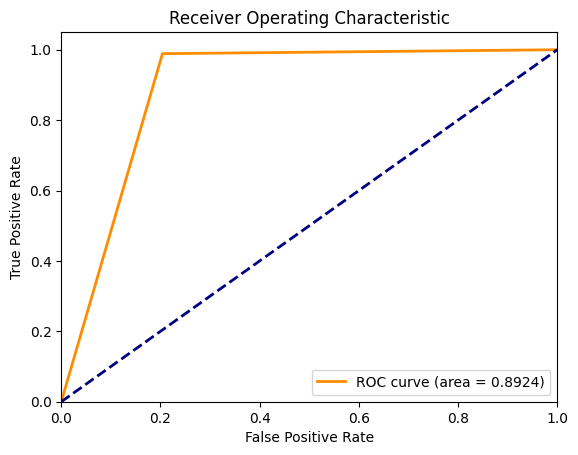

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Let's further evaluate if using Regularization can increase the model performance.** Regularization, especially elastic net that combines both Lasso or L1 and Ridge or L2. By combining both L1 and L2 penalties, Elastic Net can balance between sparsity and smoothness, offering a compromise between the benefits of Lasso and Ridge regularization. The objective in Elastic net **regression** for the is to minimize the following loss function:

 $$
\text{Elastic Net} = \sum_{i=1}^{N}\ (y_i- \hat{y})^2 + {\lambda}_1 \sum_{j=1}^{N}|{\beta}_j| + {\lambda}_2 \sum_{j=1}^{N}|{\beta}_j^2|
$$
**For Classification Problems**

 $$
\text{Elastic Net} = \frac{1}{N} \sum_{i=1}^{N} [(-y_i log(f(x))- (1 - y_i)\log(1-f(x))] + {\lambda}_1 \sum_{j=1}^{N}|{\beta}_j| + {\lambda}_2 \sum_{j=1}^{N}|{\beta}_j^2|
$$

 L1 helps in reducing overfitting by penalizing the absolute size of the coefficients, effectively driving some of them to zero and thus performing feature selection.  Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function. This penalty term is controlled by a parameter, usually denoted as λ. The objective in lasso **regression** is to minimize the following loss function:

 $$
\text{Lasso} = \sum_{i=1}^{N}\ (y_i- \hat{y})^2 + {\lambda} \sum_{j=1}^{N}|{\beta}_j|
$$

**For Classification Problems**
 $$
\text{Lasso} = \frac{1}{N} \sum_{i=1}^{N} [(-y_i log(f(x))- (1 - y_i)\log(1-f(x))] + {\lambda} \sum_{j=1}^{N}|{\beta}_j|
$$


 Simillarly, L2 shrinks the cofficient to close to zero but not zero, resulting in a smoother model that is less sensitive to noise in the data. This helps to prevent overfitting by penalizing large coefficients, making the model more robust, especially in cases of multicollinearity. The objective in Ridge **regression** is to minimize the following loss function:

  $$
\text{Ridge} = \sum_{i=1}^{N}\ (y_i- \hat{y})^2 + {\lambda} \sum_{j=1}^{N}|{\beta}_j^2|
$$

**For Classification Problems**

 $$
\text{Ridge} = \frac{1}{N} \sum_{i=1}^{N} [(-y_i log(f(x))- (1 - y_i)\log(1-f(x))] + {\lambda} \sum_{j=1}^{N}|{\beta}_j^2|
$$

where,

y_i is the actual observed value for the i-th observation.

y_hat_i or f(x) is the predicted value for the i-th observation from the regression model.

N is the total number of observation.

Beta_j is the cofficients.

λ is the penalty parameter


We are using the Grid search to find the optimal value of alpha.

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

reg = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42)


grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_train_X, y_train)


best_params = grid_search.best_params_
best_C = best_params['C']
best_l1_ratio = best_params['l1_ratio']
print(f"Best C: {best_C}, Best l1_ratio: {best_l1_ratio}")

Best C: 0.001, Best l1_ratio: 0.3


In [ ]:
reg = LogisticRegression(C=best_C, penalty='elasticnet', l1_ratio=best_l1_ratio, solver='saga', random_state=42)
reg.fit(scaled_train_X, y_train)

y_pred = reg.predict(scaled_test_X)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8922759569103828


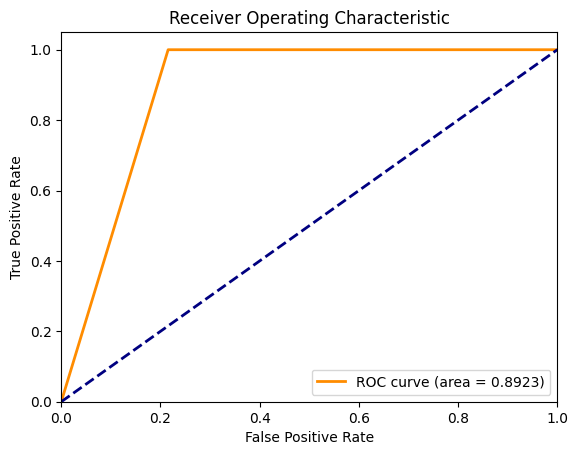

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Coefficients After Regularization:", pd.DataFrame(reg.coef_, columns=X.columns).T)
print("Intercept:", logit.intercept_)

Coefficients After Regularization:                                        0
person_emp_length               0.000000
loan_percent_income             0.000000
cb_person_cred_hist_length      0.000000
person_home_ownership_OWN      -0.110743
person_home_ownership_MORTGAGE -0.123673
person_home_ownership_OTHER     0.000000
loan_intent_EDUCATION          -0.088792
loan_intent_VENTURE            -0.072387
loan_intent_HOMEIMPROVEMENT    -0.081864
loan_intent_PERSONAL           -0.086032
loan_intent_MEDICAL            -0.101335
loan_intent_DEBTCONSOLIDATION  -0.094080
loan_grade_B                   -1.330338
loan_grade_A                   -1.332968
loan_grade_D                    0.184208
loan_grade_E                    0.000000
loan_grade_C                    0.235961
loan_grade_F                    0.000000
loan_grade_G                    0.000000
income_group_low                0.000000
income_group_middle             0.000000
income_group_high-middle        0.000000
income_group_high     

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      4363
           1       0.82      1.00      0.90      4363

    accuracy                           0.89      8726
   macro avg       0.91      0.89      0.89      8726
weighted avg       0.91      0.89      0.89      8726



The model accuracy may not be immediately apparent since the dataset is simple and may not have enough complexity to highlight the benefits of regularization. In more complex datasets with higher dimensionality or noise, regularization plays a crucial role in improving model generalization and preventing overfitting.

**Decission Tree Classifier**

Decission Tree Classifier is a binary tree that recursively splits dataset until we are left with the pure leaf nodes. It uses an information theory where the model will choose the split that maximizes the information gain. The model works in the following way:

The model fist identify the information contained in the state then uses entropy to quantify the impurity. There are many ways to implement the impurity measure, two of which scikit-learn has implemented is the Information gain and Gini Impurity or Gini Index.The impurity measure is given by:

$$
\text{Gini index (G)} =  \ {1- \sum P_i^2}\
$$
where p_i is the probability of class i.

Gini Impurity measures the impurity of a node, with lower values indicating more homogeneous nodes.

Similary, Information gain measures the reduction in entropy after a dataset is split on an attribute. It is calculated as the difference between the entropy of the original node and the weighted sum of the entropy of the child nodes:

$$
\text{Information Gain (IG)} =  \ {G(parentsnode)- \sum w_i G(childnode)}\
$$

where G is the impurity value and w is the weight of observations.


Model chooses the node with the highest information gain. It compairs every possible splits and takes the one that maximizes information gain. It troveses every possible features and feaure value to search for the best features and the corresponding threshold.

Since decision trees do not rely on distance metrics and are not affected by the scale of features. We will use the nonstandarized values.

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'max_depth': [3, 4, 5, 8],
    'max_features': [10, 15, 17, 20, 25]

}

In [ ]:
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5, 8],
                         'max_features': [10, 15, 17, 20, 25],
                         'splitter': ['best']},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {}".format(grid_search.best_score_))

Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 15, 'splitter': 'best'}
Best cross-validation accuracy: 0.8957711496082901


In [ ]:
best_split = grid_search.best_estimator_
y_pred = best_split.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Test set accuracy:{} ".format(test_accuracy))
print(class_report)

Test set accuracy:0.8927343570937428 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      4363
           1       0.82      1.00      0.90      4363

    accuracy                           0.89      8726
   macro avg       0.91      0.89      0.89      8726
weighted avg       0.91      0.89      0.89      8726



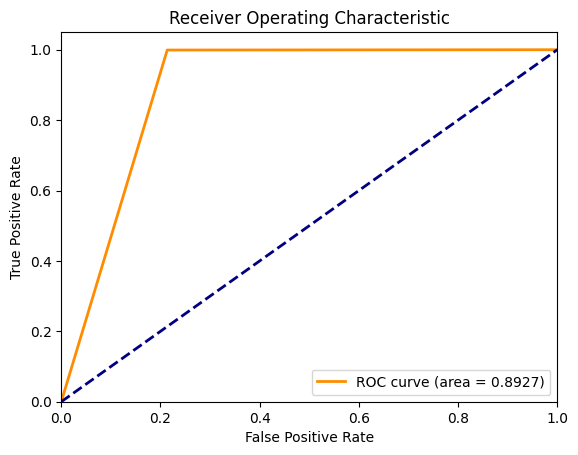

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

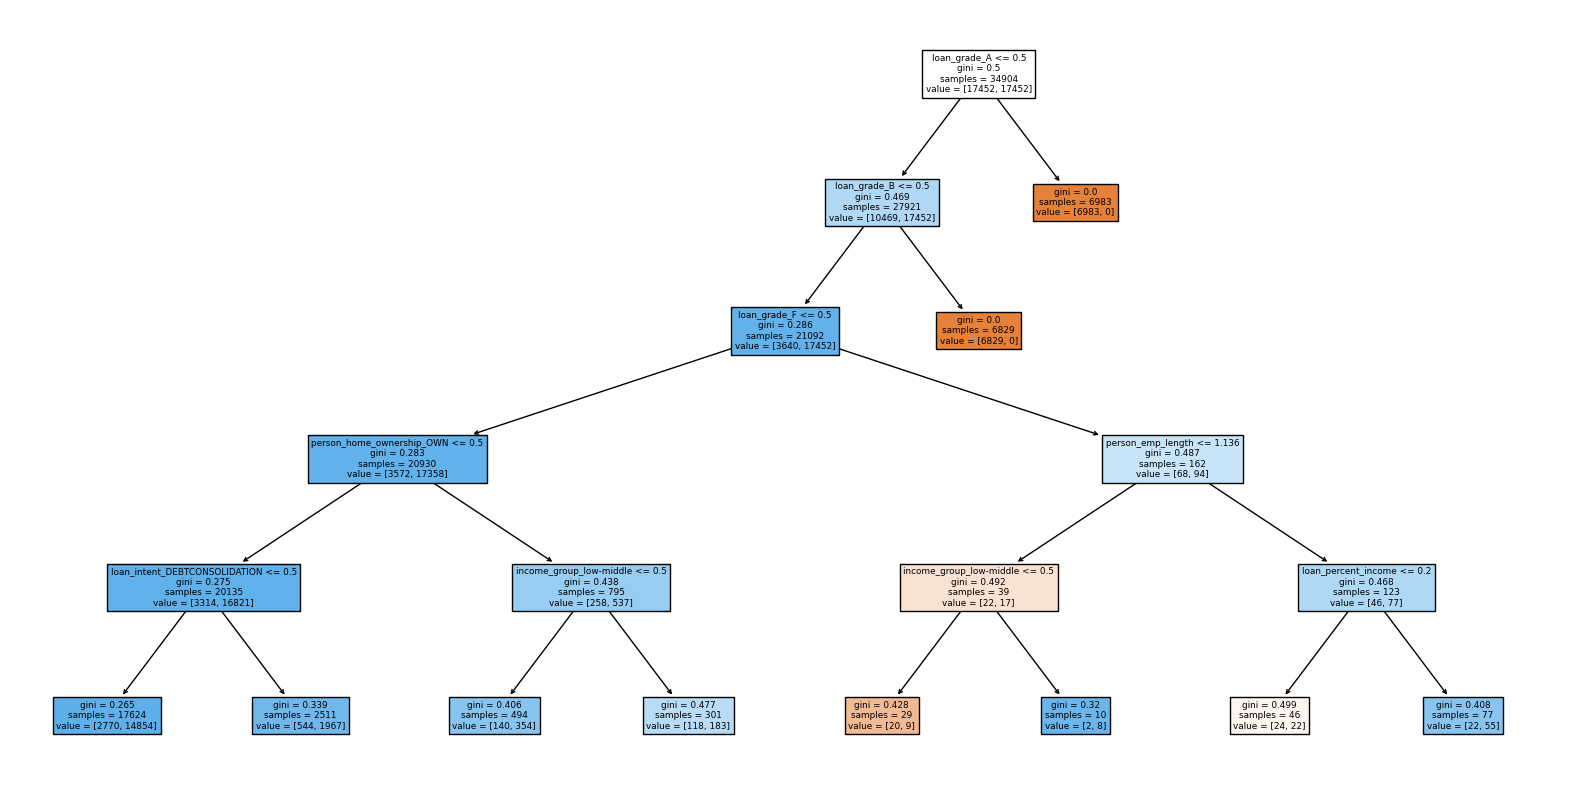

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_split, filled=True, feature_names=X_train.columns)
plt.show()

In [ ]:
def feature_imp_plots(models):
  feature_imp = models.feature_importances_
  feature_names = X.columns
  indices = np.argsort(feature_imp)[::-1]

  plt.figure(figsize=(10, 6))
  plt.title(" Global Feature importances")
  plt.bar(range(X.shape[1]), feature_imp[indices],
            color="b", align="center")
  plt.xticks(range(X.shape[1]), feature_names[indices], rotation='vertical')
  plt.xlim([-1, X.shape[1]])
  plt.ylabel('Score')
  plt.xlabel('Features')
  plt.tight_layout()
  plt.show()

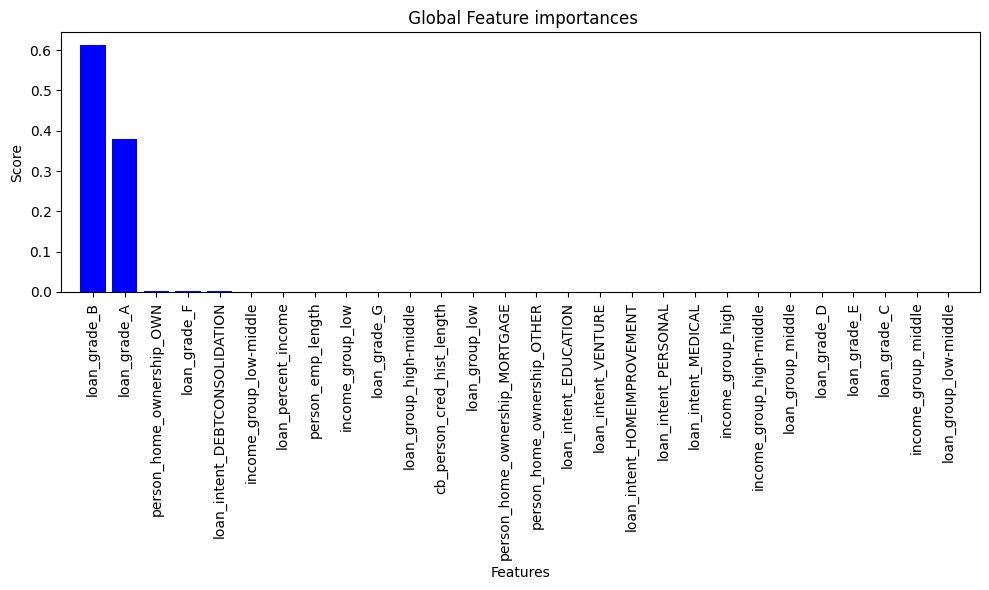

In [ ]:
feature_imp_plots(best_split)

**Random Forest**

Random Forest is an ensemble method that relies on bagging to builds multiple decision trees and merges them together to get a more accurate and stable prediction. It constructs multiple decision trees during training, where each tree is trained on a different bootstrap sample of the data and uses a random subset of features at each split. Finally it predicts by averaging the predictions of all the individual decision trees for the regression and using voting for the classification. Like decission tree, model chooses the node with the highest information gain.Here is the breakdown of the algorithm:

step 1: We first make subsets of our original data. We will do row sampling and feature sampling that means we’ll select rows and columns with replacement and create subsets of the training dataset.

step 2: We create an individual decision tree for each subset we take

step 3: Output from each decission tree are taken and voted for the final decission.



In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [80, 90, 100, 110],
    'max_depth': [20, 25],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [5, 7, 9],
    'max_features': [5, 8, 10, 15, 20]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 240 candidates, totalling 480 fits
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   1.7s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   1.2s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   1.5s
[CV] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   1.

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [20, 25],
                         'max_features': [5, 8, 10, 15, 20],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [10, 15],
                         'n_estimators': [80, 90, 100, 110]},
             verbose=2)

In [ ]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'max_depth': 25, 'max_features': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 110}


In [ ]:
best_split = grid_search.best_estimator_
y_pred = best_split.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Test set accuracy:{:.5} ".format(rf_test_accuracy))
print(class_report)

Test set accuracy:0.89583 
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      4363
           1       0.84      0.99      0.90      4363

    accuracy                           0.90      8726
   macro avg       0.91      0.90      0.89      8726
weighted avg       0.91      0.90      0.89      8726



Random Forest Classifier


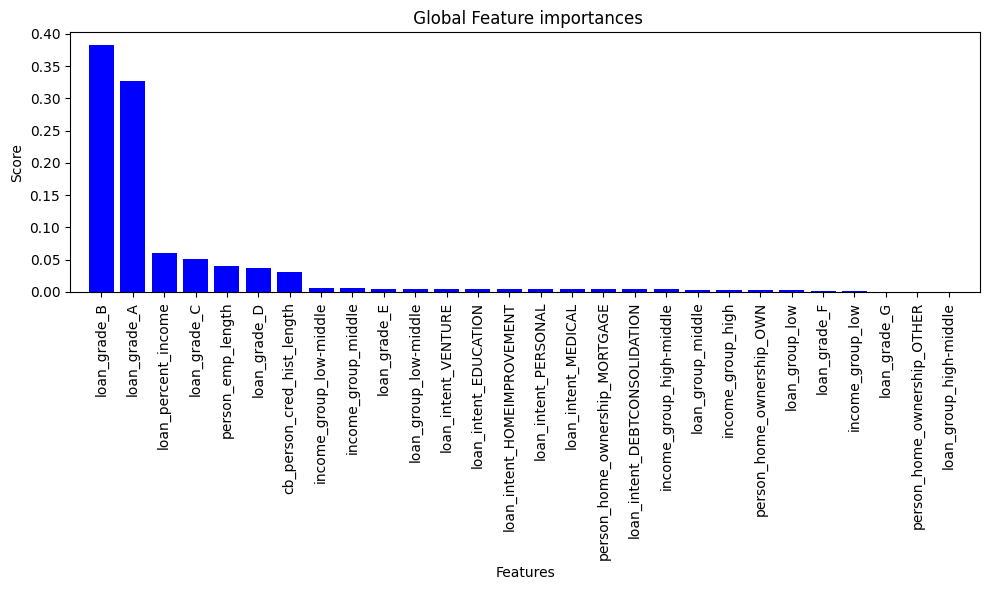

In [ ]:
print(f'Random Forest Classifier')
feature_imp_plots(best_split)

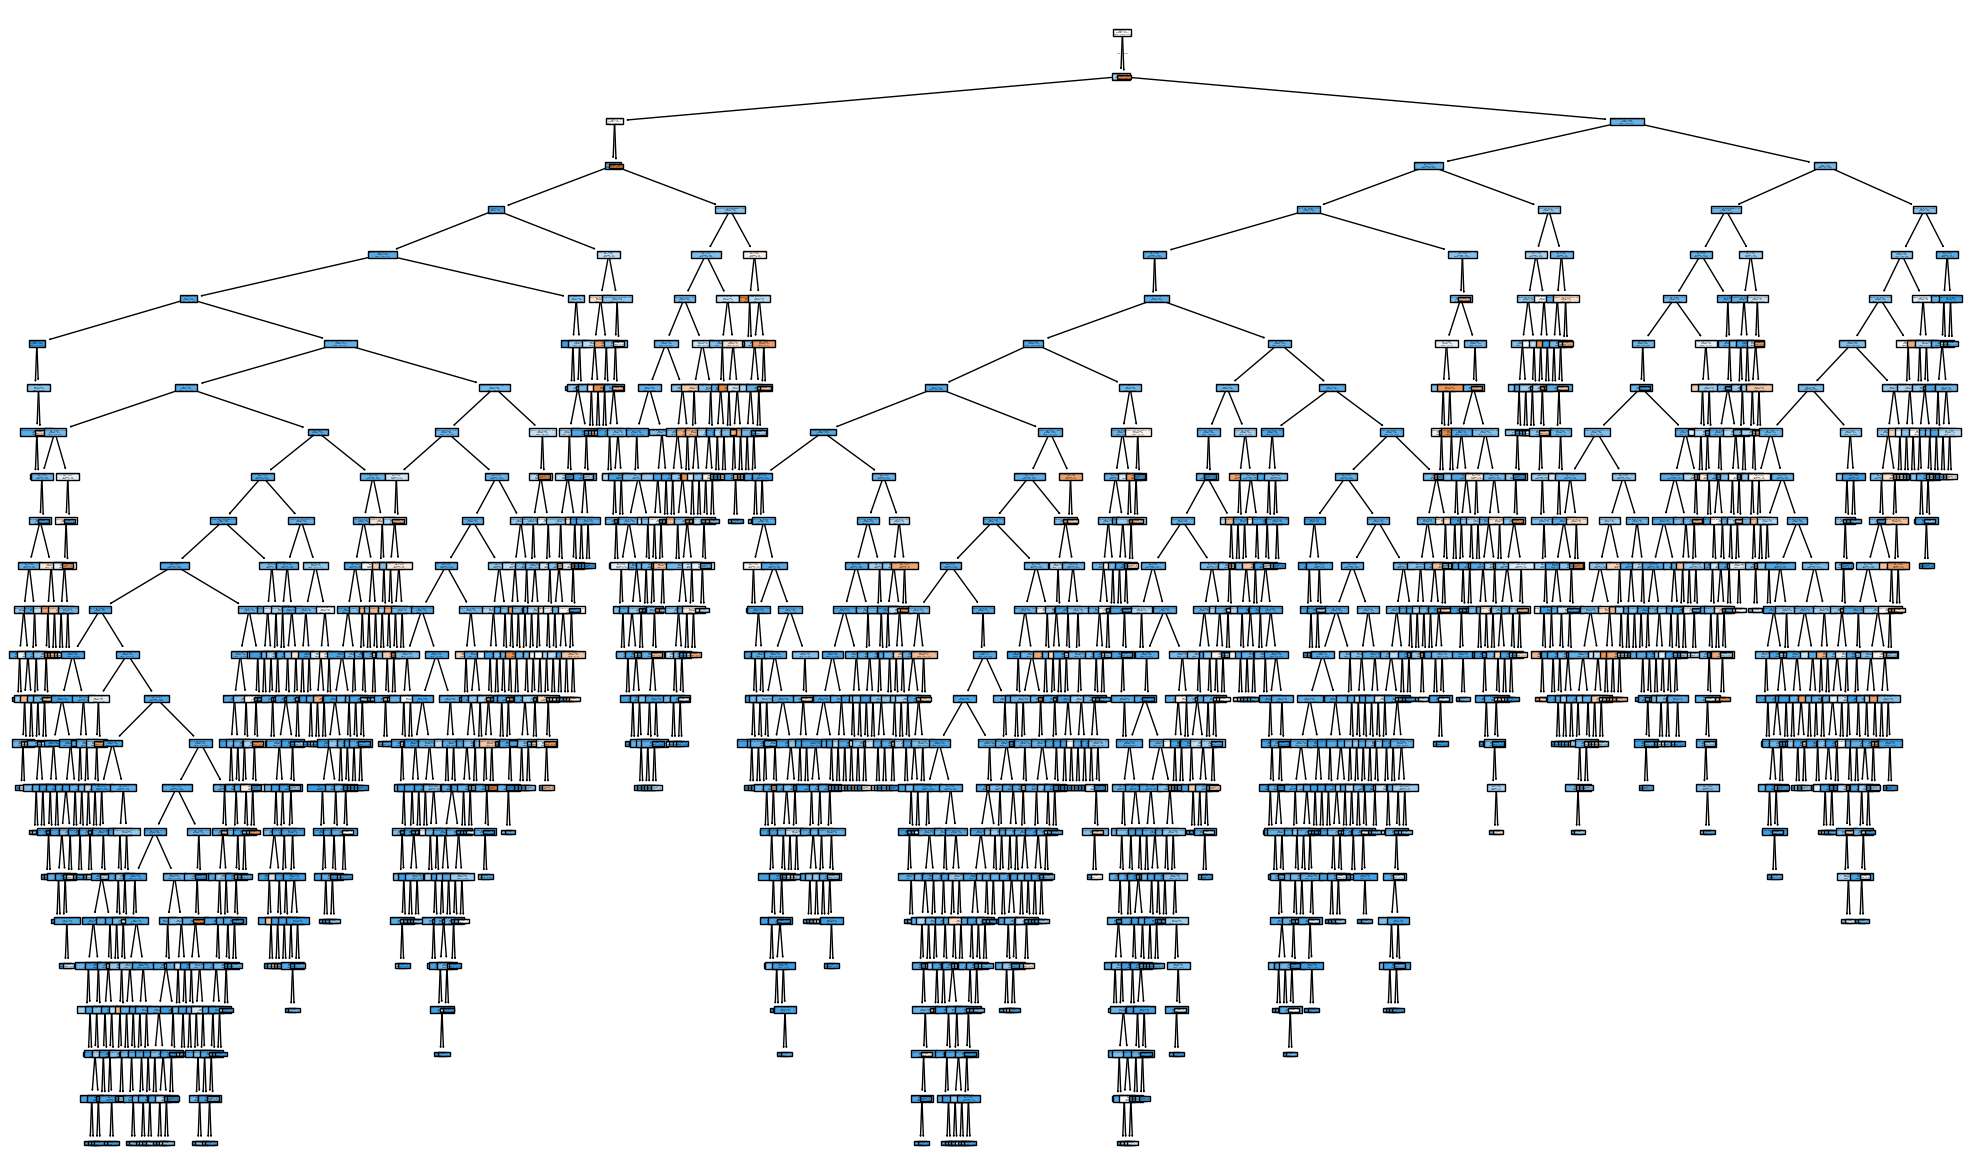

In [ ]:
#this is one of the tree to illustrate how node and leafs are bulit by the random forest
estimator = best_split.estimators_[2]
plt.figure(figsize=(25, 15))
plot_tree(estimator, filled=True, feature_names=X_train.columns)
plt.show()

**Gradiant Boosting**

Gradient boosting is an advanced machine learning ensemble method that sequentially combines the predictions of multiple weak learners, often decision trees. By adjusting the model's weights based on errors from previous iterations, it progressively reduces prediction errors, thereby enhancing the overall accuracy of the model. This is done by building a new model on the errors or residuals of the previous model. The objective of Gradiant Boosting **Classifier** is to minimize the following loss function:

$$
\text{L} =  \ -y * log(\frac{p} {1-p}) + log(1+ e^{log(\frac{p} {1-p})})
$$

Once we have our firts decission tree, for each leaf node in the tree, compute the average of the residuals of the instances that fall into that leaf.
$$
\gamma = \frac{\sum_{i=1}^{N}(y_i-\hat{y}_i)} {\sum_{i=1}^{N}(y_i-\hat{y}_i)*(1-(y_i-\hat{y}_i)}
$$

Then we Update the predictions by adding the weighted output of the new tree to the previous predictions.

$$
\hat{y}_i^ {new} = \hat{y}_i^ {old} + η * \gamma\
$$
where,

η is the learning rate that controls the contribution of each tree.

***Hyperperemetrs were choose through the cross-validation**

In [ ]:
gb = GradientBoostingClassifier(n_estimators=400,
                                 learning_rate=0.05,
                                 random_state=42,
                                 max_depth=20,
                                 max_features=20,
                                min_samples_leaf=7,
                                min_samples_split=20
                                )

In [ ]:
gb.fit(X_train, y_train)
pred_y = gb.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier  out of sample accuracy is : {:.4f}".format(acc))

Gradient Boosting Classifier  out of sample accuracy is : 0.9032


In [ ]:
class_report = classification_report(y_test, pred_y)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4363
           1       0.88      0.94      0.91      4363

    accuracy                           0.90      8726
   macro avg       0.90      0.90      0.90      8726
weighted avg       0.90      0.90      0.90      8726



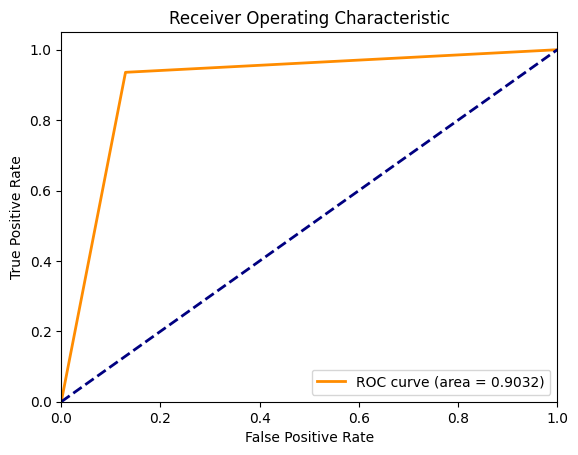

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Gradient boosting does not inherently provide model transparency, which is why it is often referred to as a black-box model. This means that it is not immediately clear which features were used and how the model reached its decisions. However, with the help of explainable artificial intelligence (XAI) techniques, we can gain insights into the model's behavior and decision-making process. One powerful XAI method is SHAP (SHapley Additive exPlanations), which allows us to create transparency by attributing the contribution of each feature to the model's predictions. By using SHAP, we can better understand how the model made specific decisions, thus shedding light on the otherwise opaque workings of the gradient boosting model.

SHAP is model-agnostic local explainability technique where its values are derived from Shapley values. Shapley values provide a fair distribution of the total prediction among the features by considering all possible combinations of features. For each feature, SHAP calculates the marginal contribution by considering all possible subsets of features that include the given feature. It then averages these marginal contributions to determine the feature's overall contribution to the prediction. SHAP interaction effect is based on Shapley interaction index from game theory and is given by

 $$
\text{ϕ}_i = \sum_{S⊆{(1,...,p)}\ (i)}\ \frac{|S|!(p-|S|-1)!} {p!} \ [val(S ∪ (i))\,\ - val(S)] $$

Where,
$$
\text{val(S)} = \int_{x \notin S}\ f(x_1,...,x_p)dp
$$
Multiple integration is done to marganinalize over a fetaure with respect to the probability of the features values and is done for all features in S.

*where,*

S is the contribution of feature values

f is model prediction

p is the no of features in the model




In [ ]:
explainer = shap.TreeExplainer(model=gb, data=None, model_output='raw',
                               feature_perturbation='tree_path_dependent')

In [ ]:
shap_value = explainer.shap_values(X_test)

In [ ]:
# visualize the second prediction's.
print(f'Predicted value: {pred_y[1]}')
print(f'Actual value: {y_test.iloc[1]}')
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value[1, :], features=X_test.iloc[1, :])

Predicted value: 0
Actual value: 0


In [ ]:
# visualize the 11th prediction's .
print(f'Predicted value: {pred_y[12]}')
print(f'Actual value: {y_test.iloc[12]}')
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value[12, :], features=X_test.iloc[12, :])

Predicted value: 0
Actual value: 0


The above explanation shows features each contributing to push the model output from the base value to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

In [ ]:
# visualize first 500 prediction's explaination in general.
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value[:500, :], features=X_test.iloc[:500, :])

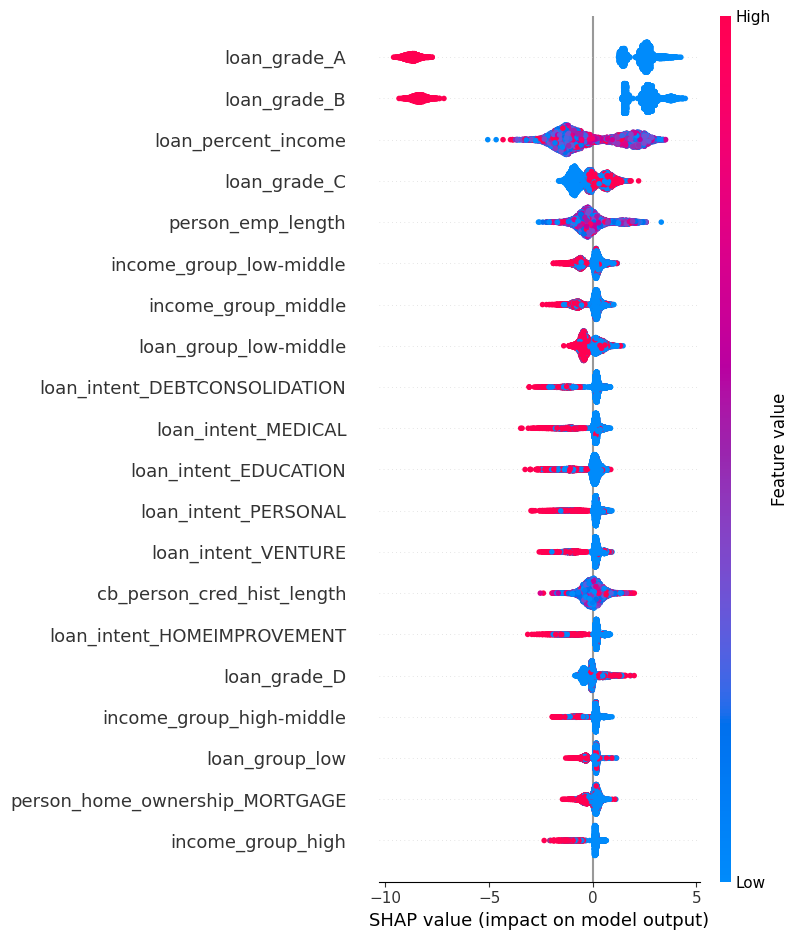

In [ ]:
#Global feature importance
shap.summary_plot(shap_value[:], X_test.iloc[:, :])

The above explaination shows, when features like loan_grade_A and loan_grade_B take the value 0, they strongly contribute to decreasing the model's predicted outcome. A SHAP value of -10 indicates a substantial negative impact on the prediction. In contrast, when these features take the value 1, they contribute to increasing the model's predicted outcome, though to a lesser extent than the negative impact of value 0. A SHAP value of 5 indicates a moderate positive impact on the prediction.

**note:** SHAP is a feature attribution method that emphasizes the importance of features. It identifies which features were utilized to make specific predictions. Similarly, another robust XAI model, [CounterFactual Explaination](https://github.com/sudkc37/Confounder-Adjusted-CFE/blob/main/Counterfactual%20explaination.pdf) that explains the minimal change in features required to modify the classifier's decision.

Once a machine learning (ML) model for credit risk assessment is developed, the next steps involve integrating its outputs into the broader accounting and financial modeling frameworks. The model, undergoes validation and calibration to ensure accuracy. These predictions are used to calculate loan loss provisions, Value at Risk (VaR), impacting the balance sheet and income statement, and guide capital allocation and stress testing *(Due the limitation of computing power we will cover those later)*. The financial impact includes adjustments to loan books, reserves, and cash flow projections. Insights from the model inform strategic decisions, such as portfolio management and risk-based pricing, optimizing returns by aligning interest rates with borrower risk. This integration enhances risk management, regulatory compliance, and financial decision-making across the organization.  
-